## DBSCAN Perform

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("Training_DU_Clustering.csv", skipinitialspace=True, sep=',')
df

VehYear  VehicleAge  WheelTypeID    VehOdo  \
0      0.382625   -0.668899    -0.929737  0.100349   
1     -1.877556    2.221071    -0.929737  1.124563   
2     -1.877556    1.643077    -0.929737 -0.877483   
3     -1.877556    1.643077    -0.929737  1.073284   
4     -1.877556    1.643077    -0.929737  0.202702   
5     -1.877556    1.643077    -0.929737  0.565054   
6     -1.877556    1.643077    -0.929737  1.158704   
7     -1.877556    1.643077    -0.929737 -1.362047   
8     -1.877556    1.643077    -0.929737 -0.615037   
9     -1.312511    1.065083    -0.929737  0.533498   
10    -1.312511    1.065083    -0.929737 -1.184135   
11    -1.312511    1.065083    -0.929737  0.846611   
12    -1.312511    1.065083    -0.929737  0.290910   
13    -1.312511    1.643077    -0.929737  1.742356   
14    -1.312511    1.065083    -0.929737  1.246163   
15    -1.312511    1.065083     2.896040  0.921285   
16    -1.312511    1.065083    -0.929737  0.882792   
17    -1.312511    1.065083    -0.929737  0.944952   
18    -1.312511    1.643077    -0.929737  1.374768   
19    -1.312511    1.065083    -0.929737  0.730044   
20    -1.312511    1.065083    -0.929737 -0.765949   
21    -1.312511    1.065083    -0.929737  0.407681   
22    -1.312511    1.065083    -0.929737  0.857152   
23    -0.747466    0.487089    -0.929737  0.179851   
24    -0.747466    1.065083    -0.929737  1.357426   
25    -0.747466    0.487089    -0.929737  0.690326   
26    -0.747466    1.065083     2.896040  0.710457   
27    -0.747466    1.065083    -0.929737  0.276084   
28    -0.747466    0.487089    -0.929737  0.830493   
29    -0.747466    1.065083    -0.929737 -0.248129   
...         ...         ...          ...       ...   
10105 -0.747466    0.487089    -0.929737  0.529077   
10106 -0.747466    0.487089    -0.929737  0.005409   
10107 -0.182420   -0.090905    -0.929737  0.332735   
10108 -0.182420    0.487089    -0.929737 -1.375172   
10109 -0.182420    0.487089    -0.929737  0.643604   
10110  0.382625   -0.090905    -0.929737  0.735756   
10111  0.382625   -0.090905    -0.929737  1.485555   
10112  0.947671   -0.668899     0.983151 -1.337359   
10113  1.512716   -1.246893     0.983151 -0.924749   
10114  0.947671   -0.668899     2.896040 -0.797097   
10115  0.947671   -0.668899     0.983151  0.666727   
10116  1.512716   -1.246893     0.983151 -2.243102   
10117 -2.442602    2.799065    -0.929737  1.563017   
10118 -1.312511    1.065083     2.896040  1.299890   
10119 -1.312511    1.643077    -0.929737  1.639051   
10120 -1.312511    1.643077    -0.929737  1.085050   
10121 -0.747466    0.487089    -0.929737  0.321514   
10122 -0.747466    1.065083    -0.929737  0.316345   
10123 -0.747466    1.065083    -0.929737 -0.554917   
10124 -0.747466    0.487089    -0.929737  0.534246   
10125 -0.182420    0.487089    -0.929737  0.954133   
10126 -2.442602    2.221071    -0.929737  1.604502   
10127 -1.877556    2.221071    -0.929737  1.377012   
10128 -1.312511    1.065083    -0.929737  0.560905   
10129 -1.312511    1.065083    -0.929737  0.284041   
10130 -1.312511    1.065083    -0.929737  0.365448   
10131 -1.312511    1.065083    -0.929737  0.381294   
10132 -0.747466    1.065083    -0.929737  0.912647   
10133  0.382625   -0.090905    -0.929737  0.750378   
10134  0.382625   -0.090905    -0.929737  0.653057   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionRetailAveragePrice  \
0                               2.638161                          1.805868   
1                              -0.356286                          0.115163   
2                              -0.217409                         -0.607877   
3                              -1.106051                         -1.358827   
4                              -1.106051                         -1.358827   
5                              -1.087171                         -1.342738   
6                              -0.686065                         -1.003874   
7                               0.2

## 1) Primo DataFrame

In [142]:
columns_toAnalyze = ['MMRAcquisitionAuctionAveragePrice', 'VehBCost']

M_Values = df[columns_toAnalyze].values

del columns_toAnalyze

In [143]:
dist = pdist(M_Values, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         3.15202893 3.7945829  ... 1.30230842 1.23282196 1.04995368]
 [3.15202893 0.         1.52110642 ... 1.90717206 2.97042827 2.1076765 ]
 [3.7945829  1.52110642 0.         ... 2.84877575 3.09243998 2.81598878]
 ...
 [1.30230842 1.90717206 2.84877575 ... 0.         1.68681857 0.44452466]
 [1.23282196 2.97042827 3.09243998 ... 1.68681857 0.         1.24230473]
 [1.04995368 2.1076765  2.81598878 ... 0.44452466 1.24230473 0.        ]]


In [144]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

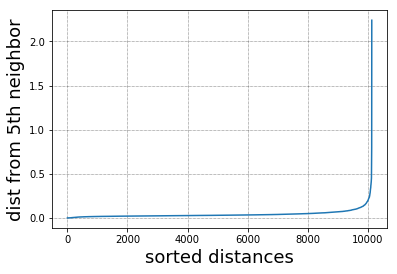

In [145]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [146]:
del index_kth_distance
del kth_distances
del d

** - Primo Clustering **

In [152]:
dbscan = DBSCAN(eps=0.1, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [153]:
Labels = dbscan.labels_

In [154]:
Labels[:40]  # prime 40 label dei primi 40 punti

array([-1,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [155]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 114, 9965,    2,   27,   13,    5,    4,    5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [156]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.034905530171208766


In [89]:
Labels_primoDF_primoClust = Labels

del Labels

** - Secondo Clustering **

In [90]:
dbscan = DBSCAN(eps=0.2, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [91]:
Labels = dbscan.labels_

In [92]:
Labels[:40]

array([-1,  0,  0, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [93]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64),
 array([ 114, 9965,    2,   27,   13,    5,    4,    5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [94]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.034905530171208766


In [95]:
Labels_primoDF_secondoClust = Labels

del Labels

** - Terzo Clustering **

In [96]:
dbscan = DBSCAN(eps=0.3, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [97]:
Labels = dbscan.labels_

In [98]:
Labels[:40]

array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [99]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([   56, 10052,     8,     9,     5,     5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [100]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.3966553310017386


In [101]:
Labels_primoDF_terzoClust = Labels

del Labels

In [102]:
del M_Values

## 2) Secondo DataFrame

In [127]:
columns_toAnalyze = ['VehOdo', 'VehBCost']

M_Values = df[columns_toAnalyze].values

del columns_toAnalyze

In [128]:
dist = pdist(M_Values, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         1.42041873 2.68341825 ... 0.82027368 1.39327107 0.68864165]
 [1.42041873 0.         2.51051148 ... 0.89549202 0.4490075  0.74235017]
 [2.68341825 2.51051148 0.         ... 2.9819263  2.06255693 2.58898844]
 ...
 [0.82027368 0.89549202 2.9819263  ... 0.         1.12994833 0.39421183]
 [1.39327107 0.4490075  2.06255693 ... 1.12994833 0.         0.82730534]
 [0.68864165 0.74235017 2.58898844 ... 0.39421183 0.82730534 0.        ]]


In [129]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

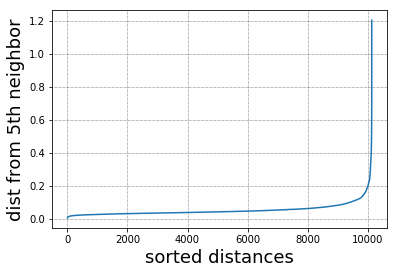

In [130]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [131]:
del index_kth_distance
del kth_distances
del d

** - Primo Clustering **

In [132]:
dbscan = DBSCAN(eps=0.1, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [133]:
Labels = dbscan.labels_

In [134]:
Labels[:40]  # prime 40 label dei primi 40 punti

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [135]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([ 117, 9996,    6,   11,    5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [136]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.16063871579700145


In [137]:
Labels_secondoDF_primoClust = Labels

del Labels

** - Secondo Clustering **

In [138]:
dbscan = DBSCAN(eps=0.15, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.17, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [139]:
Labels = dbscan.labels_

In [140]:
Labels[:40]

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [141]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([   88, 10040,     7], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [118]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.4318973264828649


In [119]:
Labels_secondoDF_secondoClust = Labels

del Labels

** - Terzo Clustering **

In [120]:
dbscan = DBSCAN(eps=0.2, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [121]:
Labels = dbscan.labels_

In [122]:
Labels[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [123]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([    4, 10131], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [124]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.517808536689089


In [125]:
Labels_secondoDF_terzoClust = Labels

del Labels

In [126]:
del M_Values

## 3) Terzo DataFrame

In [157]:
columns_toAnalyze = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost']

M_Values = df[columns_toAnalyze].values

del columns_toAnalyze

In [158]:
dist = pdist(M_Values, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         3.31425726 3.91854758 ... 1.53487329 1.39369578 1.18654513]
 [3.31425726 0.         2.51434973 ... 1.91890947 2.99390356 2.15977266]
 [3.91854758 2.51434973 0.         ... 3.36453429 3.49472712 3.20505029]
 ...
 [1.53487329 1.91890947 3.36453429 ... 0.         1.69460562 0.51477097]
 [1.39369578 2.99390356 3.49472712 ... 1.69460562 0.         1.2461109 ]
 [1.18654513 2.15977266 3.20505029 ... 0.51477097 1.2461109  0.        ]]


In [159]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

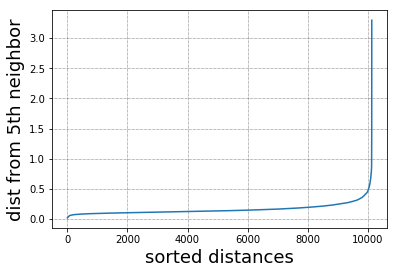

In [160]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [105]:
del index_kth_distance
del kth_distances
del d

** - Primo Clustering **

In [106]:
dbscan = DBSCAN(eps=0.3, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [107]:
Labels = dbscan.labels_

In [108]:
Labels[:40]  # prime 40 label dei primi 40 punti

array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [109]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([   56, 10052,     8,     9,     5,     5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [110]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.3966553310017386


In [112]:
Labels_terzoDF_primoClust = Labels

del Labels

** - Secondo Clustering **

In [13]:
dbscan = DBSCAN(eps=0.4, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [14]:
Labels = dbscan.labels_

In [15]:
Labels[:40]

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int64)

In [16]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([   21, 10114], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [26]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.5557710209478292


In [ ]:
Labels_terzoDF_secondoClust = Labels

del Labels

** - Terzo Clustering **

In [113]:
dbscan = DBSCAN(eps=0.5, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [114]:
Labels = dbscan.labels_

In [115]:
Labels[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([    7, 10128], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [118]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.6517189740384843


In [119]:
Labels_terzoDF_terzoClust = Labels

del Labels

In [28]:
del M_Values

## 4) Quarto DataFrame

In [161]:
columns_toAnalyze = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'WarrantyCost']

M_Values = df[columns_toAnalyze].values

del columns_toAnalyze

In [162]:
dist = pdist(M_Values, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         4.43622284 4.55489901 ... 2.68643286 1.67688527 1.50912081]
 [4.43622284 0.         2.60631407 ... 2.37059816 3.78547617 3.16717371]
 [4.55489901 2.60631407 0.         ... 3.60081664 3.93514305 3.68029625]
 ...
 [2.68643286 2.37059816 3.60081664 ... 0.         2.14590113 1.41357441]
 [1.67688527 3.78547617 3.93514305 ... 2.14590113 0.         1.2461109 ]
 [1.50912081 3.16717371 3.68029625 ... 1.41357441 1.2461109  0.        ]]


In [163]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

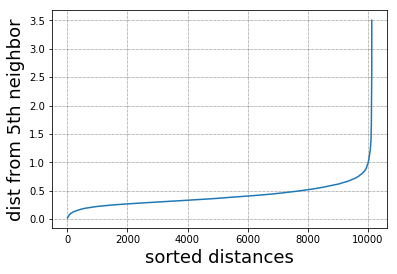

In [164]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [105]:
del index_kth_distance
del kth_distances
del d

** - Primo Clustering **

In [106]:
dbscan = DBSCAN(eps=0.6, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [107]:
Labels = dbscan.labels_

In [108]:
Labels[:40]  # prime 40 label dei primi 40 punti

array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [109]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([   56, 10052,     8,     9,     5,     5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [110]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.3966553310017386


In [112]:
Labels_quartoDF_primoClust = Labels

del Labels

** - Secondo Clustering **

In [13]:
dbscan = DBSCAN(eps=0.8, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [14]:
Labels = dbscan.labels_

In [15]:
Labels[:40]

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int64)

In [16]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([   21, 10114], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [26]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.5557710209478292


In [ ]:
Labels_quartoDF_secondoClust = Labels

del Labels

** - Terzo Clustering **

In [113]:
dbscan = DBSCAN(eps=1, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [114]:
Labels = dbscan.labels_

In [115]:
Labels[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([    7, 10128], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [118]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.6517189740384843


In [119]:
Labels_quartoDF_terzoClust = Labels

del Labels

In [28]:
del M_Values

## 5) Quinto DataFrame

In [165]:
columns_toAnalyze = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                     'MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice',
                     'VehBCost', 'WarrantyCost']

M_Values = df[columns_toAnalyze].values

del columns_toAnalyze

In [166]:
dist = pdist(M_Values, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         6.23555271 6.81431681 ... 3.59596134 1.93619015 1.97011622]
 [6.23555271 0.         2.81243046 ... 3.30437333 6.11511599 4.71755326]
 [6.81431681 2.81243046 0.         ... 4.83523106 6.85113793 5.68993007]
 ...
 [3.59596134 3.30437333 4.83523106 ... 0.         3.35054503 1.89345354]
 [1.93619015 6.11511599 6.85113793 ... 3.35054503 0.         1.81327484]
 [1.97011622 4.71755326 5.68993007 ... 1.89345354 1.81327484 0.        ]]


In [167]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

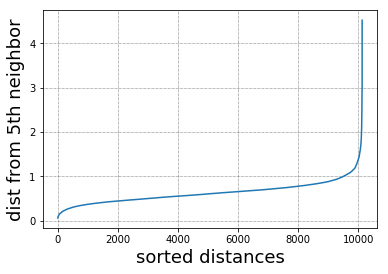

In [168]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [105]:
del index_kth_distance
del kth_distances
del d

** - Primo Clustering **

In [106]:
dbscan = DBSCAN(eps=1, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [107]:
Labels = dbscan.labels_

In [108]:
Labels[:40]  # prime 40 label dei primi 40 punti

array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [109]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([   56, 10052,     8,     9,     5,     5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [110]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.3966553310017386


In [112]:
Labels_quintoDF_primoClust = Labels

del Labels

** - Secondo Clustering **

In [13]:
dbscan = DBSCAN(eps=1.2, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [14]:
Labels = dbscan.labels_

In [15]:
Labels[:40]

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int64)

In [16]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([   21, 10114], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [26]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.5557710209478292


In [ ]:
Labels_quintoDF_secondoClust = Labels

del Labels

** - Terzo Clustering **

In [113]:
dbscan = DBSCAN(eps=1.4, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [114]:
Labels = dbscan.labels_

In [115]:
Labels[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([    7, 10128], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [118]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.6517189740384843


In [119]:
Labels_quintoDF_terzoClust = Labels

del Labels

In [28]:
del M_Values

## 6) Sesto DataFrame

In [169]:
columns_toAnalyze = ['VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
                     'MMRAcquisitionRetailAveragePrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice',
                     'VehBCost', 'WarrantyCost', 'TransmissionID', 'NationalityID']

M_Values = df[columns_toAnalyze].values

del columns_toAnalyze

In [170]:
dist = pdist(M_Values, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         6.23555271 6.81431681 ... 3.59596134 1.93619015 1.97011622]
 [6.23555271 0.         2.81243046 ... 3.30437333 6.11511599 4.71755326]
 [6.81431681 2.81243046 0.         ... 4.83523106 6.85113793 5.68993007]
 ...
 [3.59596134 3.30437333 4.83523106 ... 0.         3.35054503 1.89345354]
 [1.93619015 6.11511599 6.85113793 ... 3.35054503 0.         1.81327484]
 [1.97011622 4.71755326 5.68993007 ... 1.89345354 1.81327484 0.        ]]


In [171]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

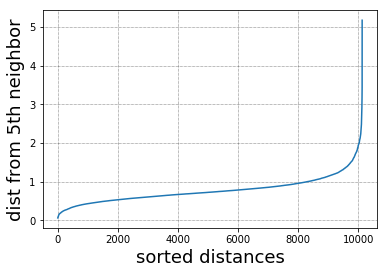

In [172]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [105]:
del index_kth_distance
del kth_distances
del d

** - Primo Clustering **

In [106]:
dbscan = DBSCAN(eps=1.2, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [107]:
Labels = dbscan.labels_

In [108]:
Labels[:40]  # prime 40 label dei primi 40 punti

array([ 0,  0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0], dtype=int64)

In [109]:
np.unique(Labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([   56, 10052,     8,     9,     5,     5], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [110]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.3966553310017386


In [112]:
Labels_sestoDF_primoClust = Labels

del Labels

** - Secondo Clustering **

In [13]:
dbscan = DBSCAN(eps=1.5, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [14]:
Labels = dbscan.labels_

In [15]:
Labels[:40]

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int64)

In [16]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([   21, 10114], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [26]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.5557710209478292


In [ ]:
Labels_sestoDF_secondoClust = Labels

del Labels

** - Terzo Clustering **

In [113]:
dbscan = DBSCAN(eps=1.8, min_samples=k)
dbscan.fit(M_Values)

DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [114]:
Labels = dbscan.labels_

In [115]:
Labels[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [116]:
np.unique(Labels, return_counts=True)

(array([-1,  0], dtype=int64), array([    7, 10128], dtype=int64))

*** Performance Index: Silhouette Coefficient ***

In [118]:
print('Silhouette: %s' % silhouette_score(M_Values, Labels))

Silhouette: 0.6517189740384843


In [119]:
Labels_sestoDF_terzoClust = Labels

del Labels

In [28]:
del M_Values

## DBSCAN Validation

genero 6 DataFrame con oggetti random (normal standard) di pari dimensioni dei 6 df qui sopra e ne calcolo il silhouette per confrontarlo con i nostri df.

In [ ]:
randomObjectsN = 40771

- ** Primo DF **

In [87]:
columns_toAnalyze = ['VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'WarrantyCost',
                    'TransmissionID', 'NationalityID']

Random_df = pd.DataFrame(np.random.randn(randomObjectsN, 8), columns = columns_toAnalyze)
Random_df

VehicleAge  WheelTypeID    VehOdo  MMRAcquisitionAuctionAveragePrice  \
0        0.651233     0.209735 -2.047576                           0.977273   
1        1.029965    -1.056364 -0.482550                           0.089832   
2       -1.214171     0.046837 -0.129777                           0.561173   
3       -0.146771    -1.063104  0.794070                          -0.115629   
4        1.351070    -0.588202 -2.195775                           0.237519   
...           ...          ...       ...                                ...   
10130   -1.365594     1.187533  1.761527                           0.297376   
10131    0.245002    -0.405345 -0.862965                          -0.366175   
10132    1.043582    -0.168485 -0.353553                          -0.180684   
10133   -0.058534    -0.251349  0.668959                           2.005717   
10134    0.720153     0.166237 -0.291099                           1.627576   

       VehBCost  WarrantyCost  TransmissionID  NationalityID  
0      0.739021     -0.120891        0.683006       0.434153  
1      0.474110     -0.101703        0.379266      -0.691110  
2     -0.429239      0.619492       -0.059788       0.927180  
3      1.770400      0.845975        0.094863       0.538307  
4     -0.256026     -0.689260       -0.413951       0.811739  
...         ...           ...             ...            ...  
10130 -2.676507     -0.598201       -1.456878      -1.385331  
10131  1.608875     -0.085924       -0.448298       1.960652  
10132 -1.052829      1.739386        1.864102       1.401819  
10133 -1.061011     -0.905029       -0.205965       0.300926  
10134 -0.840421      0.833171        0.679576       1.089651  

[10135 rows x 8 columns]

In [88]:
M_Values_randomDF = Random_df.values

In [89]:
del dbscan
del dist

In [90]:
dist = pdist(M_Values_randomDF, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         2.53225661 3.17256599 ... 3.67563458 3.7170727  2.71095986]
 [2.53225661 0.         3.27835417 ... 3.63105701 3.34036317 3.13931841]
 [3.17256599 3.27835417 0.         ... 3.36361461 2.69925182 2.38891012]
 ...
 [3.67563458 3.63105701 3.36361461 ... 0.         4.42012993 2.42017426]
 [3.7170727  3.34036317 2.69925182 ... 4.42012993 0.         2.51429984]
 [2.71095986 3.13931841 2.38891012 ... 2.42017426 2.51429984 0.        ]]


In [91]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

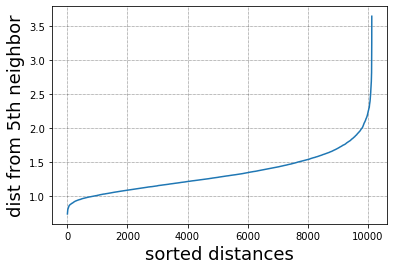

In [92]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [93]:
del index_kth_distance
del kth_distances
del d

In [94]:
dbscan = DBSCAN(eps=1.5, min_samples=k)
dbscan.fit(M_Values_randomDF)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [95]:
Labels_randomDF = dbscan.labels_

In [96]:
np.unique(Labels_randomDF, return_counts=True)

(array([-1,  0], dtype=int64), array([ 977, 9158], dtype=int64))

In [97]:
print('Silhouette: %s' % silhouette_score(M_Values_randomDF, Labels_randomDF))

Silhouette: 0.18324615151378246


- ** Secondo DF **

In [98]:
columns_toAnalyze = ['VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost']

Random_df = pd.DataFrame(np.random.randn(randomObjectsN, 3), columns = columns_toAnalyze)
Random_df

VehOdo  MMRAcquisitionAuctionAveragePrice  VehBCost
0      0.641884                           1.841027  1.302797
1     -0.885501                           0.611752  0.382504
2      1.393954                           1.461069  0.565773
3      1.204234                           0.732551 -0.386037
4     -0.886477                          -0.994403 -0.058215
...         ...                                ...       ...
10130  0.495130                           0.982525  0.907176
10131 -0.406568                           1.638909  0.550983
10132  0.622930                          -0.491656  0.233757
10133  0.049585                           0.577727 -0.084032
10134 -1.058122                           2.157513 -1.809413

[10135 rows x 3 columns]

In [99]:
M_Values_randomDF = Random_df.values

In [100]:
del dbscan
del dist

In [101]:
dist = pdist(M_Values_randomDF, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         2.16586282 1.1194563  ... 2.56605043 1.96724192 3.56034177]
 [2.16586282 0.         2.43943479 ... 1.87483232 1.04556099 2.68768967]
 [1.1194563  2.43943479 0.         ... 2.12552276 1.73489747 3.48413771]
 ...
 [2.56605043 1.87483232 2.12552276 ... 0.         1.25430983 3.74413824]
 [1.96724192 1.04556099 1.73489747 ... 1.25430983 0.         2.58837352]
 [3.56034177 2.68768967 3.48413771 ... 3.74413824 2.58837352 0.        ]]


In [102]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

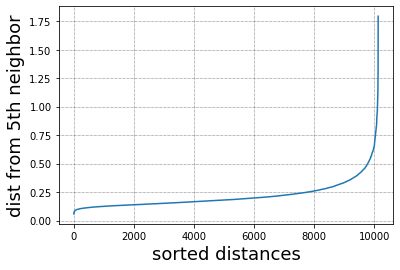

In [103]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [104]:
del index_kth_distance
del kth_distances
del d

In [105]:
dbscan = DBSCAN(eps=0.3, min_samples=k)
dbscan.fit(M_Values_randomDF)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [106]:
Labels_randomDF = dbscan.labels_

In [107]:
np.unique(Labels_randomDF, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([ 786, 9262,    8,    5,    7,    7,    5,    6,    5,    7,    8,
           6,    6,    3,    4,    5,    5], dtype=int64))

In [108]:
print('Silhouette: %s' % silhouette_score(M_Values_randomDF, Labels_randomDF))

Silhouette: -0.24722230316309016


- ** Terzo DF **

In [109]:
columns_toAnalyze = ['VehOdo', 'VehBCost']

Random_df = pd.DataFrame(np.random.randn(40771, 2), columns = columns_toAnalyze)
Random_df

VehOdo  VehBCost
0     -0.298380 -0.504304
1     -0.313721 -0.638156
2      0.021158 -0.952467
3     -0.181912 -0.205193
4     -1.308139  0.246261
...         ...       ...
10130 -0.182406  0.126673
10131  1.184700 -1.696306
10132  0.381579  1.243943
10133 -1.422344  0.505795
10134 -0.895035 -2.102933

[10135 rows x 2 columns]

In [110]:
M_Values_randomDF = Random_df.values

In [111]:
del dbscan
del dist

In [112]:
dist = pdist(M_Values_randomDF, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         0.13472896 0.55041371 ... 1.87582284 1.51115691 1.70634459]
 [0.13472896 0.         0.45927719 ... 2.00642495 1.59300658 1.57591099]
 [0.55041371 0.45927719 0.         ... 2.22578594 2.05188408 1.47070752]
 ...
 [1.87582284 2.00642495 2.22578594 ... 0.         1.94910263 3.58208339]
 [1.51115691 1.59300658 2.05188408 ... 1.94910263 0.         2.6614871 ]
 [1.70634459 1.57591099 1.47070752 ... 3.58208339 2.6614871  0.        ]]


In [113]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

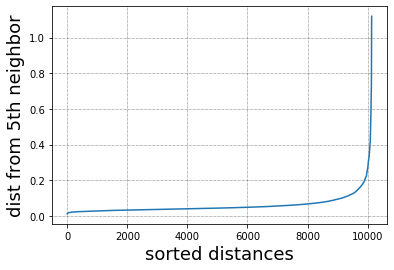

In [114]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [115]:
del index_kth_distance
del kth_distances
del d

In [116]:
dbscan = DBSCAN(eps=0.2, min_samples=k)
dbscan.fit(M_Values_randomDF)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [117]:
Labels_randomDF = dbscan.labels_

In [118]:
np.unique(Labels_randomDF, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 131, 9990,    6,    8], dtype=int64))

In [119]:
print('Silhouette: %s' % silhouette_score(M_Values_randomDF, Labels_randomDF))

Silhouette: 0.2649034771577


- ** Quarto DF **

In [120]:
columns_toAnalyze = ['MMRAcquisitionAuctionAveragePrice', 'VehBCost']

Random_df = pd.DataFrame(np.random.randn(40771, 2), columns = columns_toAnalyze)
Random_df

MMRAcquisitionAuctionAveragePrice  VehBCost
0                               1.565550 -1.385906
1                               0.268899  1.065904
2                              -1.092330  0.614063
3                               1.773416  1.077702
4                               1.002604 -0.920119
...                                  ...       ...
10130                          -1.885020 -0.389830
10131                          -0.530633 -0.868252
10132                           0.135371  0.616153
10133                          -2.462099 -0.062598
10134                           0.850002 -0.618819

[10135 rows x 2 columns]

In [121]:
M_Values_randomDF = Random_df.values

In [122]:
del dbscan
del dist

In [123]:
dist = pdist(M_Values_randomDF, 'euclidean')
dist = squareform(dist)
print(dist)

[[0.         2.77356763 3.32628998 ... 2.46041759 4.23946994 1.04901518]
 [2.77356763 0.         1.4342617  ... 0.46915398 2.95497353 1.78212552]
 [3.32628998 1.4342617  0.         ... 1.22770328 1.52778792 2.3005761 ]
 ...
 [2.46041759 0.46915398 1.22770328 ... 0.         2.684689   1.42683324]
 [4.23946994 2.95497353 1.52778792 ... 2.684689   0.         3.35848079]
 [1.04901518 1.78212552 2.3005761  ... 1.42683324 3.35848079 0.        ]]


In [124]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

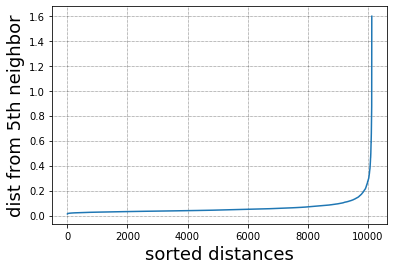

In [125]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', labelsize=10)
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [126]:
del index_kth_distance
del kth_distances
del d

In [127]:
dbscan = DBSCAN(eps=0.2, min_samples=k)
dbscan.fit(M_Values_randomDF)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [128]:
Labels_randomDF = dbscan.labels_

In [129]:
np.unique(Labels_randomDF, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([ 128, 9984,   10,    5,    3,    5], dtype=int64))

In [130]:
print('Silhouette: %s' % silhouette_score(M_Values_randomDF, Labels_randomDF))

Silhouette: 0.11386011741678899


# Considerazioni Finali

l'unico buono è:

In [ ]:
df_DBSCAN = pd.read_csv("Training_DU_Clustering_forResultsAnalysis.csv", skipinitialspace=True, sep=',')

df_DBSCAN['labels_DBSCAN'] = Labels_terzoDF_primoClust
df_DBSCAN

** File in Output: **